<a href="https://colab.research.google.com/github/trannolis/data/blob/main/Spark_Homework_Assignment_MMDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Short Spark Tutorial

Let's first mount our Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Let's setup Spark on your Colab environment. Run the cell below!

In [ ]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     |████████████████████████████████| 204.8MB 57kB/s 
     |████████████████████████████████| 204kB 45.3MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.2-py2.py3-none-any.whl size=205186687 sha256=026c8b31ea57b97dfc6008bf7aa86aacf8852306608307fba692bfad43435e26
  Stored in directory: /root/.cache/pip/wheels/8b/09/da/c1f2859bcc86375dc972c5b6af4881b3603269bcc4c9be5d16
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 10 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading

Now let's import the libraries we need to use for this Notebook

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

Let's initialize the Spark context.:
### Concept: Spark Session
While creating the spark session you can specify the configurations for that session using the Spark Conf object like the number of executors and memory requirements.

In [ ]:
# create the session
conf = SparkConf().set("spark.ui.port", "4050")

# create the context
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()

You can easily check the current version and get the link of the web interface. In the Spark UI, you can monitor the progress of your job and debug the performance bottlenecks (if your Colab is running with a **local runtime**).

In [ ]:
spark

If you are running this Colab on the Google hosted runtime, the cell below will create a *ngrok* tunnel which will allow you to still check the Spark UI.




## <b>The Task</b>##


After you downloaded the two csv files from Classes, go into your Google Drive (using your NYU email), right-click on "My Drive" and select "Upload Files." Then select the two csv files for this homework and upload them to your drive.

In [ ]:
athletes = spark.read.csv('drive/MyDrive/athletes.csv', header=True, inferSchema = True)
nations = spark.read.csv('drive/MyDrive/countries.csv', header=True, inferSchema = True)

If you run successfully the setup stage, you are ready to work with the **2016 Olympics in Rio de Janeiro** dataset. In case you want to read more about it, check out the [Kaggle description](https://www.kaggle.com/rio2016/olympic-games). The athletes dataset represents every athlete that participated in some form in the Olympics, and the countries dataset represents information about the nations that participated in Rio.

In [ ]:
athletes.printSchema()

root
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- nationality: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- height: double (nullable = true)
 |-- weight: integer (nullable = true)
 |-- sport: string (nullable = true)
 |-- gold: integer (nullable = true)
 |-- silver: integer (nullable = true)
 |-- bronze: integer (nullable = true)



In [ ]:
nations.printSchema()

root
 |-- country: string (nullable = true)
 |-- code: string (nullable = true)
 |-- population: integer (nullable = true)
 |-- gdp_per_capita: double (nullable = true)



Use the Spark Dataframe API perform an inner-join on the 'nationality' and the country 'code' columns, so that you will be able to see the full dataset, which contains information about each athlete and the nation which they are participating under.

In [ ]:
athletes = athletes.withColumnRenamed("nationality", "code")
athletes_nations = athletes.join(nations, on = "code", how = "inner")
athletes_nations.printSchema()

root
 |-- code: string (nullable = true)
 |-- id: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- height: double (nullable = true)
 |-- weight: integer (nullable = true)
 |-- sport: string (nullable = true)
 |-- gold: integer (nullable = true)
 |-- silver: integer (nullable = true)
 |-- bronze: integer (nullable = true)
 |-- country: string (nullable = true)
 |-- population: integer (nullable = true)
 |-- gdp_per_capita: double (nullable = true)



<h1><b>Show</b></h1>
The .show command is what we can use to print our dataframe using Spark.


In [ ]:
athletes_nations.show()

+----+---------+--------------------+------+--------+------+------+------------+----+------+------+--------------+----------+----------------+
|code|       id|                name|   sex|     dob|height|weight|       sport|gold|silver|bronze|       country|population|  gdp_per_capita|
+----+---------+--------------------+------+--------+------+------+------------+----+------+------+--------------+----------+----------------+
| ESP|736041664|      A Jesus Garcia|  male|10/17/69|  1.72|    64|   athletics|   0|     0|     0|         Spain|  46418269|25831.5823052954|
| KOR|532037425|          A Lam Shin|female| 9/23/86|  1.68|    56|     fencing|   0|     0|     0|  Korea, South|  50617045|27221.5240509661|
| CAN|435962603|         Aaron Brown|  male| 5/27/92|  1.98|    79|   athletics|   0|     0|     1|        Canada|  35851774| 43248.529909341|
| MDA|521041435|          Aaron Cook|  male|  1/2/91|  1.83|    80|   taekwondo|   0|     0|     0|       Moldova|   3554150|1848.06180430428|

## Lazy Execution in Spark


*   Spark is build upon the concept of **lazy executions**. Hence it is faster and smarter.
*   In cluster mode we have a concept of Driver and Executor, Driver is the main program where the spark session is mantained and it coordinates with the executor, Executor is the worker node in the distributed enviornment where the transformations are performed.
*   Here below we can see some examples of lazy execution and their importance.

### Concept: Collect vs Take:
#### **Collect** 
is an action call in Spark, which is used to collect and observe the data. It ***brings the complete data*** into the driver and it may have Out of Memory (OOM) exceptions and should be used **carefully**.<br>
####**Take** 
is another action call which is used to observe and query the data, this works ***lazily*** and will only fetch the required data in the driver and we can observe the time difference between the queries.






In [ ]:
%time athletes_nations.collect()[:6]

CPU times: user 64.9 ms, sys: 3.52 ms, total: 68.4 ms
Wall time: 1.21 s


[Row(code='ESP', id=736041664, name='A Jesus Garcia', sex='male', dob='10/17/69', height=1.72, weight=64, sport='athletics', gold=0, silver=0, bronze=0, country='Spain', population=46418269, gdp_per_capita=25831.5823052954),
 Row(code='KOR', id=532037425, name='A Lam Shin', sex='female', dob='9/23/86', height=1.68, weight=56, sport='fencing', gold=0, silver=0, bronze=0, country='Korea, South', population=50617045, gdp_per_capita=27221.5240509661),
 Row(code='CAN', id=435962603, name='Aaron Brown', sex='male', dob='5/27/92', height=1.98, weight=79, sport='athletics', gold=0, silver=0, bronze=1, country='Canada', population=35851774, gdp_per_capita=43248.529909341),
 Row(code='MDA', id=521041435, name='Aaron Cook', sex='male', dob='1/2/91', height=1.83, weight=80, sport='taekwondo', gold=0, silver=0, bronze=0, country='Moldova', population=3554150, gdp_per_capita=1848.06180430428),
 Row(code='NZL', id=33922579, name='Aaron Gate', sex='male', dob='11/26/90', height=1.81, weight=71, sport=

In [ ]:
%time athletes_nations.take(6)

CPU times: user 3.16 ms, sys: 0 ns, total: 3.16 ms
Wall time: 312 ms


[Row(code='ESP', id=736041664, name='A Jesus Garcia', sex='male', dob='10/17/69', height=1.72, weight=64, sport='athletics', gold=0, silver=0, bronze=0, country='Spain', population=46418269, gdp_per_capita=25831.5823052954),
 Row(code='KOR', id=532037425, name='A Lam Shin', sex='female', dob='9/23/86', height=1.68, weight=56, sport='fencing', gold=0, silver=0, bronze=0, country='Korea, South', population=50617045, gdp_per_capita=27221.5240509661),
 Row(code='CAN', id=435962603, name='Aaron Brown', sex='male', dob='5/27/92', height=1.98, weight=79, sport='athletics', gold=0, silver=0, bronze=1, country='Canada', population=35851774, gdp_per_capita=43248.529909341),
 Row(code='MDA', id=521041435, name='Aaron Cook', sex='male', dob='1/2/91', height=1.83, weight=80, sport='taekwondo', gold=0, silver=0, bronze=0, country='Moldova', population=3554150, gdp_per_capita=1848.06180430428),
 Row(code='NZL', id=33922579, name='Aaron Gate', sex='male', dob='11/26/90', height=1.81, weight=71, sport=

Which call was faster? And how much faster was it?

## Get the count of the amount of athletes participating for each nation:
We will see two approaches:


1.   RDD based approach using standard map and reduce functions, we will also see the Action / Transformation operations of Spark. 
2.   Using Dataframes API



In [ ]:
# The below line has an deliberate error.
all_nations = athletes_nations.rdd.map(lambda row: (row.nation, 1))

Note When you will run the above map cell which is a transformation it will execute perfectly while if tou run the below **take** cell it will throw you an exception. <br>
The error is not because the below **take** cell is wrong, it is because the above cell where we used map is wrong and has some issue with the syntax.<br>

### Concept: Actions and Transformations
Spark has a concept of **Actions** and **Transformations**, Map is a Transformation and take, reduce_by_key are Actions.<br>

Transformations are the operations which **do not require data shuffling** and sparks creates a lineage of such operations in the form of a DAG and lazily executes all of the transformations at once whenver an action call is made. <br>

Hence, eventhough the above map statement is wrong we don't get an error since it is not yet executed, but the code throws an error when it is actually **executed by the take action call**.

In [ ]:
# The below execution will throw an error read the above para for info.
all_nations.take(6)

Py4JJavaError: ignored

Now lets correct the map transformation and run it again.

In [ ]:
# Correcting the name of the column.
# To remind you this is what we had:
# all_nations = athletes_nations.rdd.map(lambda row: (row.nation, 1))
all_nations = athletes_nations.rdd.map(lambda row: (row.country, 1))

In [ ]:
all_nations.take(6)

[('Spain', 1),
 ('Korea, South', 1),
 ('Canada', 1),
 ('Moldova', 1),
 ('New Zealand', 1),
 ('Australia', 1)]

In [ ]:
nations_count = all_nations.reduceByKey(lambda a, b: a+b).sortBy(lambda r: -r[1])
nations_count.take(10)

[('United States', 567),
 ('Brazil', 485),
 ('Germany', 441),
 ('Australia', 431),
 ('France', 410),
 ('China', 404),
 ('United Kingdom', 374),
 ('Japan', 346),
 ('Canada', 321),
 ('Spain', 313)]

In [ ]:
nation_counts_schema = nations_count.map(lambda x: Row(country=x[0], num_athletes=x[1]))
nation_counts_df = spark.createDataFrame(nation_counts_schema)
nation_counts_df.show()

+--------------+------------+
|       country|num_athletes|
+--------------+------------+
| United States|         567|
|        Brazil|         485|
|       Germany|         441|
|     Australia|         431|
|        France|         410|
|         China|         404|
|United Kingdom|         374|
|         Japan|         346|
|        Canada|         321|
|         Spain|         313|
|         Italy|         312|
|        Russia|         286|
|   Netherlands|         249|
|        Poland|         242|
|     Argentina|         223|
|  Korea, South|         213|
|   New Zealand|         208|
|       Ukraine|         205|
|        Sweden|         164|
|       Hungary|         154|
+--------------+------------+
only showing top 20 rows



#### Repeating the same GroupBy using the DF API

### Dataframe API:
Dataframes are abstractions build over RDDs and are similar to it, but they have a structure and a schema with named columns, like a table in a relational database. We can also perform SQL Type operations with DataFrames. 

In [ ]:
athletes_nations.groupby('country').agg(count('*').alias("num_athletes")).sort\
("num_athletes", ascending=False).show()

+--------------+------------+
|       country|num_athletes|
+--------------+------------+
| United States|         567|
|        Brazil|         485|
|       Germany|         441|
|     Australia|         431|
|        France|         410|
|         China|         404|
|United Kingdom|         374|
|         Japan|         346|
|        Canada|         321|
|         Spain|         313|
|         Italy|         312|
|        Russia|         286|
|   Netherlands|         249|
|        Poland|         242|
|     Argentina|         223|
|  Korea, South|         213|
|   New Zealand|         208|
|       Ukraine|         205|
|        Sweden|         164|
|      Colombia|         154|
+--------------+------------+
only showing top 20 rows



### Spark SQL Example:
Let's use an SQL query to find the nations that sent over 100 athletes to Rio in 2016.

In [ ]:
nation_counts_df.registerTempTable("nation_counts")
query = "SELECT * FROM nation_counts WHERE num_athletes > 100"
top_nations = spark.sql(query)
top_nations.take(8)

[Row(country='United States', num_athletes=567),
 Row(country='Brazil', num_athletes=485),
 Row(country='Germany', num_athletes=441),
 Row(country='Australia', num_athletes=431),
 Row(country='France', num_athletes=410),
 Row(country='China', num_athletes=404),
 Row(country='United Kingdom', num_athletes=374),
 Row(country='Japan', num_athletes=346)]

## Compat with Pandas

Now we can can convert to Pandas. 
We will convert the spark dataframe we just found using SQL into Pandas.

Text(0.5, 1.0, 'Number of Athletes for Each Country at the 2016 Summer Olympics')

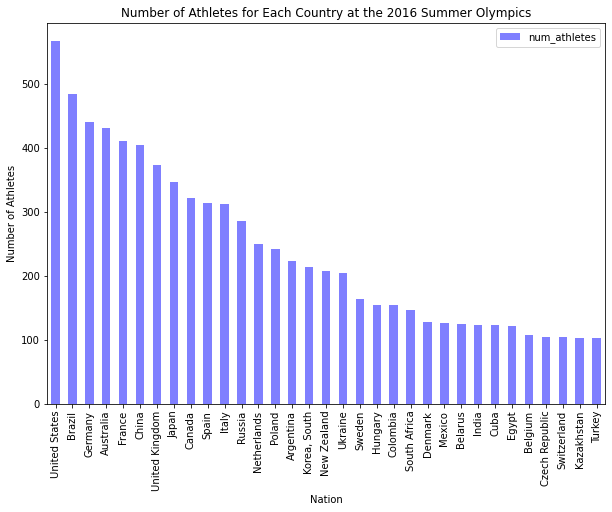

In [ ]:
top_nations_pd = top_nations.toPandas()
pl = top_nations_pd.plot(kind="bar", 
                            x="country", y="num_athletes", 
                            figsize=(10, 7),  alpha=0.5, color="blue")
pl.set_xlabel("Nation")
pl.set_ylabel("Number of Athletes")
pl.set_title("Number of Athletes for Each Country at the 2016 Summer Olympics")

Example of more complex SQL query.

Finds the amount of athletes from each country who competed in wrestling, in descending order.

In [ ]:
athletes_nations.registerTempTable("athletes_nations")
query = "SELECT country, COUNT(*) AS num_athletes \
FROM athletes_nations WHERE sport == 'wrestling' GROUP BY country \
ORDER BY num_athletes DESC"
nations = spark.sql(query)
nations.show()

+-------------+------------+
|      country|num_athletes|
+-------------+------------+
|       Russia|          18|
|   Azerbaijan|          14|
|United States|          14|
|       Turkey|          14|
|        China|          13|
|         Iran|          12|
|   Kazakhstan|          12|
|      Georgia|          11|
|     Bulgaria|          11|
|      Ukraine|          11|
|        Japan|          10|
|    Venezuela|          10|
|        Egypt|          10|
|         Cuba|          10|
|     Mongolia|          10|
|        India|           9|
|      Armenia|           8|
|      Belarus|           8|
|       Poland|           8|
|       Canada|           8|
+-------------+------------+
only showing top 20 rows



##In-Class Exercise:##
Create a Spark dataframe that shows the amount of male and female American athletes who participated in the 2016 Summer Olympics.

In [ ]:
#Start under here

## Concept:  Caching
Caching in Spark is a very important concept which should be used carefully and efficiently as and when required. <br>
An RDD/DF is re-evaluated each time an action is called on it, if you cache that RDD/DF, it will be cached and stored in the specified memory, so that when you want to do repeated calls on some RDDs or DFs they are fast and optimized <br>
These are highly useful when you are using some RDD or DF iteratively for example in a loop.<br>
You should be careful while caching and use it only when required, else you are bound to OOM exceptions.


In [ ]:
from pyspark.sql import functions as F
grouped_nations = athletes_nations.groupby("country").agg(F.collect_set("id").\
alias("athlete_id"),F.collect_set("name").alias("names"))

In [ ]:
grouped_nations.show()

+---------------+--------------------+--------------------+
|        country|          athlete_id|               names|
+---------------+--------------------+--------------------+
|           Chad|[167699785, 58978...|[Bibiro Ali Taher...|
|       Paraguay|[138745925, 24437...|[Gabriela Mosquei...|
|         Russia|[849987723, 93776...|[Evgeny Koptelov,...|
|          Yemen|[853131625, 98483...|[Nooran Ahmed Ali...|
|   Korea, North|[798606388, 13700...|[Hyon Gyong Kim, ...|
|        Senegal|[441669814, 87771...|[Balla Dieye, Abd...|
|         Sweden|[409930037, 79744...|[Fredrik Petersen...|
|         Guyana|[425181289, 89265...|[Brenessa Thompso...|
|          Burma|[110457904, 18103...|[Naing Soe Yan, Y...|
|        Eritrea|[92162694, 467504...|[Ghirmay Ghebresl...|
|    Philippines|[189267095, 25159...|[Hidilyn Diaz, Ro...|
|       Djibouti|[395323200, 13650...|[Ayanleh Souleima...|
|   Puerto Rico*|[37881707, 240687...|[Aurea Cruz, Wesl...|
|          Tonga|[374168059, 75991...|[A

In [ ]:
grouped_nations.cache()

DataFrame[country: string, athlete_id: array<int>, names: array<string>]

In [ ]:
%time grouped_nations.collect()

CPU times: user 8.08 ms, sys: 1.87 ms, total: 9.95 ms
Wall time: 2.51 s


[Row(country='Chad', athlete_id=[167699785, 589789761], names=['Bibiro Ali Taher', 'Bachir Mahamat']),
 Row(country='Paraguay', athlete_id=[138745925, 244377433, 121145247, 569399978, 970701386, 318342628, 582647371, 556512285, 855138617, 92890058, 529017724], names=['Gabriela Mosqueira', 'Arturo Rivarola Trappe', 'Karen Riveros', 'Carmen Patricia Martinez', 'Derlys Ayala', 'Fabrizio Zanotti', 'Paulo Bernardo Reichardt', 'Marcelo Aguirre', 'Benjamin Hockin Brusquetti', 'Julieta Granada', 'Veronica Cepede Royg']),
 Row(country='Russia', athlete_id=[849987723, 93776802, 320992856, 528001593, 26501082, 153868407, 739855069, 335759270, 976263519, 71569433, 148544473, 771200886, 244208041, 238009548, 480514013, 99074928, 167916854, 503276231, 858324078, 995446610, 572752822, 11854539, 417651899, 598990857, 475190404, 642911122, 151596328, 968996509, 806788576, 798252460, 514719063, 877558321, 343525700, 102725469, 832285116, 80802864, 399441834, 83837014, 286940521, 735957750, 201671999, 10

#Homework#
References:

https://www.w3schools.com/sql/sql_groupby.asp

https://www.w3schools.com/sql/sql_orderby.asp

https://www.w3schools.com/sql/sql_ref_as.asp

https://www.w3schools.com/sql/sql_count_avg_sum.asp

In [ ]:
# Name: 

In [ ]:
# (10 pts)
# 1. What are the top 10 nations in terms of athlete participation?

In [ ]:
# (15 pts)
# 2. Find the top 3 athletes who won the most gold medals at the 2016 Olympics
#HINT: Write an SQL Query. 
#No credit will be received unless runnable code gets you the result

athletes_nations.registerTempTable("athletes_nations")

In [ ]:
# (20 pts)
# 3. Find the amount of athletes that participated in each sport, in decending order.
 

In [ ]:
# (20 pts) 
# 4. Find the number of total medals that each country won, from most to least.



In [ ]:
# (20 pts)
# 5. Convert the spark dataframe you just created in Q3 to Pandas, and plot a bar graph
#    of the top 30 nations who won the most medals in 2016. Make sure the graph has an 
#    x label, y label, and a title 
#    Hint: use slicing after you convert the dataframe into Pandas

In [ ]:
# (15 pts)
# 6. Any other interesting analysis? 